# **EXERCÍCIO PROGRAMA 1**

## **Alunos:**  

*   Amanda Cristina Mazer - NUSP: 10200951
*   Carlos Alberto Silva de Souza - NUSP: 8539408
*   Leonardo Miranda de Brito - NUSP: 12630364


## **GitHub do projeto + dados:**

*   Link para o GitHub: https://github.com/Giganoide01/MAC5768_EPs
*   Link para a pasta do Google Drive: https://drive.google.com/drive/u/0/folders/1WEzT7nZTrtw9EBntSM8hCzoGQyDAQUIw


## **Informações sobre a aquisição dos dados:**

As imagens de objetos da base criada foram classificadas em 10 classes de objetos. Para todas as classes, foram adquiridas imagens de, no mínimo, 6 objetos diferentes e, no máximo, 10 objetos. Para todos os objetos, foram adquiridas imagens em 3 fundos distintos e em 4 tipos de iluminação distintas. Para cada situação especificada, foram realizadas 3 repetições.
As informações de aquisição para a criação da base de imagens foram codificadas e os números que representam cada classe, fundo e iluminação podem ser verificados através dos itens abaixo: 

### **Classes:**
*   1 - Facas (fcs)
*   2 - Copos (cpo)
*   3 - Garfos (grf)
*   4 - Tênis (tns)
*   5 - Canetas (can)
*   6 - Livros (lvr)
*   7 - Colheres de pau (cdp)
*   8 - Pratos (prt)
*   9 - Chaves (chv)
*   10 - Anéis (ans)

### **Fundos:**
*   1 - Liso amarelo claro
*   2 - Liso rosa/salmão
*   3 - Liso vermelho

### **Iluminações:**
*   1 - Indoor/Dia
*   2 - Indoor/Noite
*   3 - Outdoor/Dia
*   4 - Outdoor/Noite

Para as aquisições, foram utilizados três modelos de celular, com diferentes resoluções:
*   Motorola Z2 Play (6MP)
*   Xiaomi Redmi Note 8 (12MP)
*   Motorola G7 Play (8MP)


## **Apresentação dos dados:**

### **Pasta do Drive:**

Inicialmente, deve ser criado um atalho da pasta do Google Drive - fornecida através do link anteriormente - para o Drive do usuário. Em seguida, através do código a seguir, o Google Colab é conectado ao Drive, é montada uma pasta e alterado o diretório da pasta. O comando "!ls" lista todos os arquivos que se encontram no diretório de trabalho.

In [ ]:
# Montando a pasta:
from google.colab import drive
drive.mount('/content/gdrive')

# Alterando o diretório:
import os
os.chdir('/content/gdrive/My Drive/MAC5768 - EPs/')

# Listando os arquivos do diretório:
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 Anel		     EP1.ipynb				 MetaDados.gsheet
 Caneta		    'EP1 Leonardo.ipynb'		 Monitoria-20-04.ipynb
 Chave		     Faca				 Prato
'Colher de pau'      Garfo				 skimage_intro.ipynb
 Copo		    'Informações padronizadas EP.gdoc'	 Tênis
'EP1 Amanda.ipynb'   Livro
'EP1 Carlos.ipynb'   MetaDadosc.xlsx


### **Metadados:**

Na sequência, é então possível realizar a leitura do arquivo de metadados das imagens adquiridas, através do formato de "DataFrame" da biblioteca "Pandas". O arquivo de metadados possui uma tabela principal, com as informações de condição de aquisição de cada imagem, e também as tabelas de "Classe", "Fundo" e "Iluminacao". Estas últimas podem ser lidas separadamente, as quais contêm a relação dos códigos que foram padronizados e utilizados na tabela principal de metadados.

In [ ]:
# Leitura do arquivo de Metadados:
import pandas as pd
metadados = pd.read_excel('MetaDadosc.xlsx', sheet_name='Metadados')
%load_ext google.colab.data_table
metadados

,nome_arq,classe,numero_obj,repeticao,fundo,iluminacao
0,lvr1,6,1,1,1,2
1,lvr2,6,1,2,1,2
2,lvr3,6,1,3,1,2
3,lvr4,6,2,1,1,2
4,lvr5,6,2,2,1,2
...,...,...,...,...,...,...
3271,tns356,4,9,2,3,3
3272,tns357,4,9,3,3,3
3273,tns358,4,10,1,3,3
3274,tns359,4,10,2,3,3


In [ ]:
# Leitura da tabela contendo os códigos das classes de objetos:
classes = pd.read_excel('MetaDadosc.xlsx', sheet_name='Classe')
classes

,codigo,descricao,abreviacao
0,1,Faca,fcs
1,2,Copo,cpo
2,3,Garfo,grf
3,4,Tênis,tns
4,5,Caneta,can
5,6,Livro,lvr
6,7,Colher de pau,cdp
7,8,Prato,prt
8,9,Chave,chv
9,10,Anel,ans


In [ ]:
# Leitura da tabela contendo os códigos dos fundos utilizados para as aquisições:
fundos = pd.read_excel('MetaDadosc.xlsx', sheet_name='Fundo')
fundos

,codigo,descricao
0,1,Liso amarelo claro
1,2,Liso rosa/salmão
2,3,Liso vermelho


In [ ]:
# Leitura da tabela contendo os códigos das iluminações utilizadas para as aquisições:
iluminacoes = pd.read_excel('MetaDadosc.xlsx', sheet_name='Iluminacao')
iluminacoes

,codigo,descricao
0,1,Indoor/dia
1,2,Indoor/noite
2,3,Outdoor/dia
3,4,Outdoor/noite


### **Tabela Global Sumária:**

Através do arquivo de metadados, é possível gerar uma tabela global sumária, a qual apresenta um resumo geral das imagens que foram adquiridas, contendo o número de classes de objetos, o número total de imagens, o tamanho total da base de imagens criada, assim como a resolução das imagens para cada classe. O código abaixo apresenta essa tabela.

In [ ]:
descricao_tgs = ['Número de classes', 'Número de imagens', 'Tamanho da base (MB)']
valores_tgs = [classes.shape[0], metadados.shape[0]] # Número total de classes e número total de amostras

# Computando o tamanho da base e verificando a resolução das imagens por classe:
from skimage import io
tamanho_total = 0
classes_descr = []
for i in range(classes.shape[0]): # Criação dos atributos da tabela global sumária
  classe = classes.iloc[i]['descricao']
  classes_descr.append(classe)
  abreviacao = classes.iloc[i]['abreviacao'] 
  nomes_imagens = os.listdir(classe) 
  for n in nomes_imagens: 
    tamanho_total += os.path.getsize(classe + '/' + n)
  im = io.imread(classe + '/' + abreviacao + str(i+1) + '.jpg') 
  descricao_tgs.append('Resolução imagens de ' + classe)
  valores_tgs.append(str(im.shape[0]) + ' x ' + str(im.shape[1]))  # Resolução
valores_tgs.insert(2, round(tamanho_total/(10**6)))  # Tamanho da base

# Tabela:
tgs = pd.DataFrame(list(zip(descricao_tgs, valores_tgs)), columns = ['Descrição', 'Valor'])
tgs.set_index('Descrição')

,Valor
Descrição,
Número de classes,10
Número de imagens,3276
Tamanho da base (MB),6018
Resolução imagens de Faca,3264 x 2448
Resolução imagens de Copo,3000 x 4000
Resolução imagens de Garfo,3264 x 2448
Resolução imagens de Tênis,3000 x 4000
Resolução imagens de Caneta,3264 x 1836
Resolução imagens de Livro,3000 x 4000


### **Tabela detalhada por classe:**

Ainda, é possível analisar os dados adquiridos separadamente para cada classe de objetos, através da tabela detalhada por classe, apresentada a seguir. Nela, são descritos os nomes dos objetos utilizados, a quantidade de objetos por classe, as variações de fundo e de iluminação utilizadas, o número de repetições realizadas em cada situação e o número total de imagens adquiridas para cada classe.

In [ ]:
numero_objetos = []
total_amostras = []
variacoes_fundo = []
variacoes_iluminacao = []
numero_repeticoes = []

# Descrição em texto da relação entre os códigos e a descrição dos fundos das imagens
descricao_fundo = ''
for f in range(fundos.shape[0]):
  descricao_fundo += str(fundos.iloc[f]['codigo']) + '-' + str(fundos.iloc[f]['descricao'])
  if f < fundos.shape[0]-1:
    descricao_fundo += ', '

# Descrição em texto da relação entre os códigos e a descrição das iluminações nas imagens
descricao_iluminacao = ''
for il in range(iluminacoes.shape[0]):
  descricao_iluminacao += str(iluminacoes.iloc[il]['codigo']) + '-' + str(iluminacoes.iloc[il]['descricao'])
  if il < iluminacoes.shape[0]-1:
    descricao_iluminacao += ', '

# Construção dos atributos da tabela detalhada por classe
for i in range(classes.shape[0]):
  codigo = classes.iloc[i]['codigo']
  numero_objetos.append(metadados[metadados['classe']==codigo]['numero_obj'].nunique())
  variacoes_fundo.append(str(fundos.shape[0]) + ' (' + descricao_fundo + ')')
  variacoes_iluminacao.append(str(iluminacoes.shape[0]) + ' (' + descricao_iluminacao + ')')
  numero_repeticoes.append(metadados['repeticao'].nunique())
  total_amostras.append(metadados[metadados['classe']==codigo]['nome_arq'].nunique())

# Tabela:
tdc = pd.DataFrame(list(zip(classes_descr, numero_objetos, variacoes_fundo, variacoes_iluminacao, numero_repeticoes, total_amostras)),
                   columns = ['Nome do objeto', 'Número de objetos', 'Variações de fundo (com descrição)',
                              'Variações de iluminação (com descrição)', 'Número de repetições', 'Total de amostras'])
tdc.set_index("Nome do objeto")

,Número de objetos,Variações de fundo (com descrição),Variações de iluminação (com descrição),Número de repetições,Total de amostras
Nome do objeto,,,,,
Faca,7,"3 (1-Liso amarelo claro, 2-Liso rosa/salmão, 3...","4 (1-Indoor/dia, 2-Indoor/noite, 3-Outdoor/dia...",3,252
Copo,10,"3 (1-Liso amarelo claro, 2-Liso rosa/salmão, 3...","4 (1-Indoor/dia, 2-Indoor/noite, 3-Outdoor/dia...",3,360
Garfo,6,"3 (1-Liso amarelo claro, 2-Liso rosa/salmão, 3...","4 (1-Indoor/dia, 2-Indoor/noite, 3-Outdoor/dia...",3,216
Tênis,10,"3 (1-Liso amarelo claro, 2-Liso rosa/salmão, 3...","4 (1-Indoor/dia, 2-Indoor/noite, 3-Outdoor/dia...",3,360
Caneta,10,"3 (1-Liso amarelo claro, 2-Liso rosa/salmão, 3...","4 (1-Indoor/dia, 2-Indoor/noite, 3-Outdoor/dia...",3,360
Livro,10,"3 (1-Liso amarelo claro, 2-Liso rosa/salmão, 3...","4 (1-Indoor/dia, 2-Indoor/noite, 3-Outdoor/dia...",3,360
Colher de pau,8,"3 (1-Liso amarelo claro, 2-Liso rosa/salmão, 3...","4 (1-Indoor/dia, 2-Indoor/noite, 3-Outdoor/dia...",3,288
Prato,10,"3 (1-Liso amarelo claro, 2-Liso rosa/salmão, 3...","4 (1-Indoor/dia, 2-Indoor/noite, 3-Outdoor/dia...",3,360
Chave,10,"3 (1-Liso amarelo claro, 2-Liso rosa/salmão, 3...","4 (1-Indoor/dia, 2-Indoor/noite, 3-Outdoor/dia...",3,360


### **Visualização da base MNIST-like:**

A partir da base criada, é possível também visualizar as imagens através de uma matriz em uma única imagem, chamada "MNIST-like" e mostrada a seguir. Nela, cada linha da matriz representa uma classe distinta de objetos e cada coluna representa uma imagem distinta. As imagens foram selecionadas aleatoriamente para cada classe, para que fossem consideradas as diferentes variações estabelecidas na aquisição das imagens.

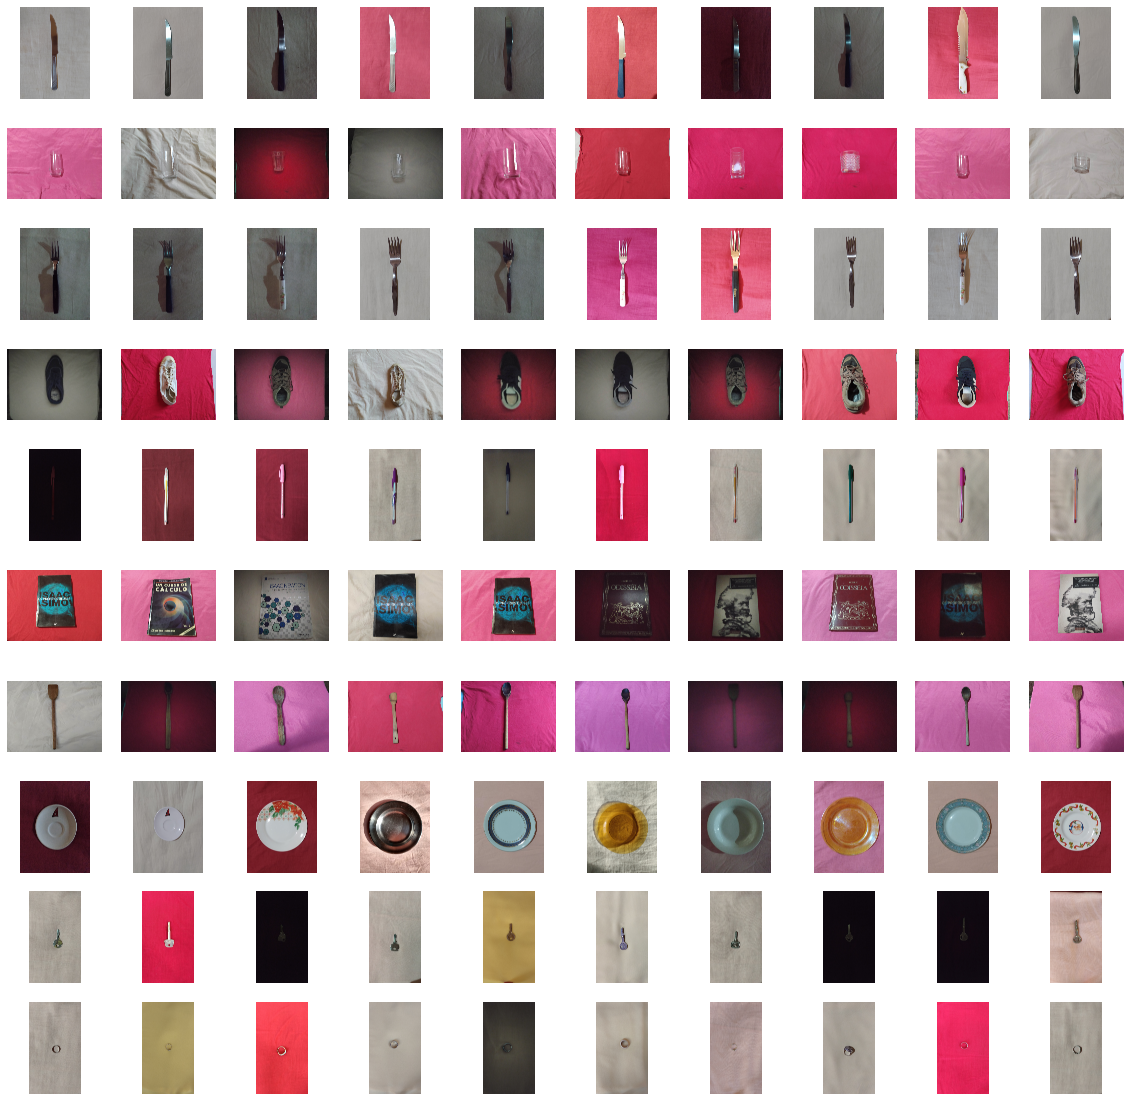

In [ ]:
import random
diretorio = '/content/gdrive/My Drive/MAC5768 - EPs/'
imagens = []
for i in range(classes.shape[0]): 
  classe = classes.iloc[i]['descricao']
  nomes_imagens = os.listdir(diretorio + classe)
  amostra = random.sample(nomes_imagens, 10) # Seleção aleatória das imagens
  for a in amostra:
    imagens.append(io.imread(diretorio + classe + '/' + a)) # Leitura das imagens selecionadas aleatoriamente

import matplotlib.pyplot as plt
n_colunas, n_linhas = 10, classes.shape[0]
fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(20, 20))
for i,imagem in enumerate(imagens): # Exibição do conjunto de imagens
    l, c = (i//n_colunas, i%n_colunas)
    axs[l,c].imshow(imagem)
    axs[l,c].axis('off')
plt.show()